In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

In [28]:
df=pd.read_csv("/home/sid/Documents/credit1.csv");

In [29]:
X=df.drop(['Class'],1)
y=df['Class']

In [30]:
trainX,testX,trainY,testY=train_test_split(X,y,test_size=0.2)

In [31]:
sm=BorderlineSMOTE(random_state=2)
Xoversampled,Yoversampled=sm.fit_sample(trainX,trainY)

In [32]:
c0=0
c1=0
for i in trainY:
    if(i==0):
        c0+=1
    else:
        c1+=1

In [33]:
c0

227456

In [34]:
c1

389

In [35]:
c0=0
c1=0
for i in Yoversampled:
    if(i==0):
        c0+=1
    else:
        c1+=1

In [36]:
c0

227456

In [37]:
c1

227456

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
model=GaussianNB()

In [40]:
model.fit(trainX,trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
result_nb1=model.predict(testX)

In [42]:
c0=0
c1=0
for i in testY:
    if i==0:
        c0=c0+1
    else:
        c1=c1+1

In [43]:
c1/c0

0.001811498619391829

In [44]:
confusion_matrix(result_nb1,testY)

array([[56473,    43],
       [  386,    60]])

In [45]:
accuracy_score(result_nb1,testY)

0.992468663319406

In [46]:
roc_auc_score(result_nb1,testY)

0.566884150748056

In [47]:
f1_score(testY,result_nb1,average='weighted')

0.9948099561434228

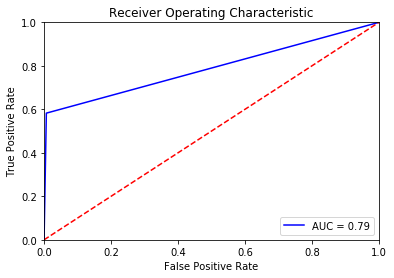

In [48]:
import sklearn.metrics as metrics
preds = result_nb1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
model2=GaussianNB()

In [50]:
model2.fit(Xoversampled,Yoversampled)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
result_nb2=model2.predict(testX)

In [52]:
accuracy_score(result_nb2,testY)

0.995031775569678

In [53]:
confusion_matrix(result_nb2,testY)

array([[56622,    46],
       [  237,    57]])

In [54]:
roc_auc_score(result_nb2,testY)

0.5965329027072112

In [55]:
f1_score(testY,result_nb2,average='weighted')

0.9962227232871969

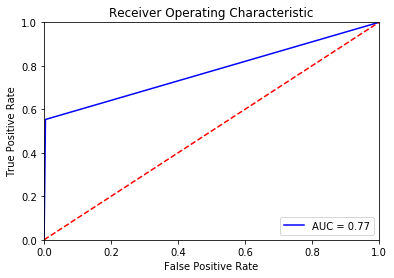

In [56]:
import sklearn.metrics as metrics
preds = result_nb2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree1=DecisionTreeClassifier()

In [26]:
dtree1.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
result_dt1=dtree1.predict(testX)

In [28]:
print(accuracy_score(result_dt1,testY))

0.9990168884519505


In [29]:
confusion_matrix(result_dt1,testY)

array([[56830,    26],
       [   30,    76]])

In [30]:
f1_score(testY,result_dt1,average='weighted')

0.9990263241569588

In [31]:
roc_auc_score(result_dt1,testY)

0.8582619182257195

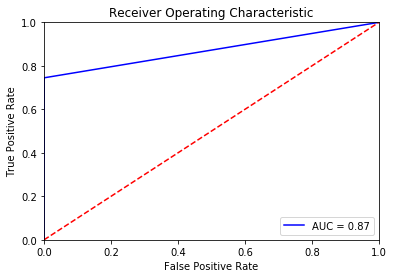

In [32]:
import sklearn.metrics as metrics
preds = result_dt1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
dtree2=DecisionTreeClassifier()

In [34]:
dtree2.fit(Xoversampled,Yoversampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
result_dt2=dtree2.predict(testX)

In [36]:
confusion_matrix(result_dt2,testY)

array([[56829,    21],
       [   31,    81]])

In [37]:
print(accuracy_score(result_dt2,testY))

0.9990871107053826


In [38]:
roc_auc_score(result_dt2,testY)

0.861422446287222

In [39]:
f1_score(testY, result_dt2, average='weighted')

0.9991083997533916

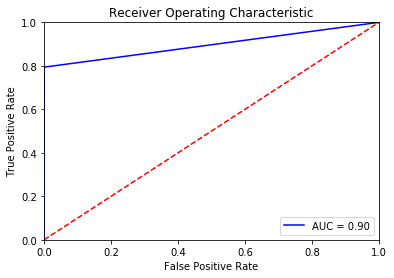

In [40]:
import sklearn.metrics as metrics
preds = result_dt2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc1=RandomForestClassifier()

In [43]:
rfc1.fit(trainX,trainY)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
result_rf1=rfc1.predict(testX)

In [45]:
print(accuracy_score(result_rf1,testY))

0.9995962220427653


In [46]:
f1_score(testY, result_rf1, average='weighted')

0.999577898675122

In [47]:
roc_auc_score(result_rf1,testY)

0.9821771231832572

In [48]:
confusion_matrix(result_rf1,testY)

array([[56857,    20],
       [    3,    82]])

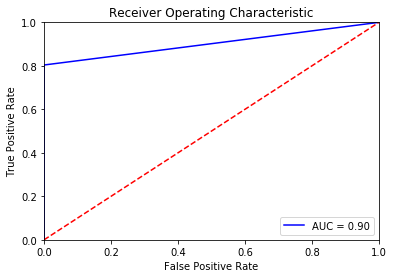

In [49]:
import sklearn.metrics as metrics
preds = result_rf1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
rfc2=RandomForestClassifier()

In [51]:
rfc2.fit(Xoversampled,Yoversampled)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
result_rf2=rfc2.predict(testX)

In [53]:
print(accuracy_score(result_rf2,testY))

0.9995435553526912


In [54]:
f1_score(testY, result_rf2, average='weighted')

0.9995241642817629

In [55]:
confusion_matrix(result_rf2,testY)

array([[56855,    21],
       [    5,    81]])

In [56]:
roc_auc_score(result_rf2,testY)

0.9707456204194519

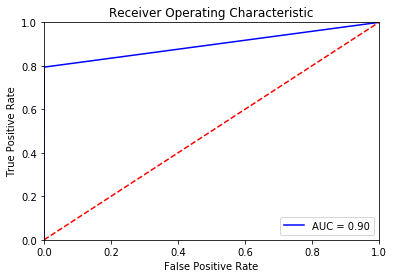

In [57]:
import sklearn.metrics as metrics
preds = result_rf2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
from xgboost import XGBClassifier
my_model = XGBClassifier(
    colsample_bytree=0.7, subsample=0.7, max_depth=23, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"])
my_model.fit(trainX, trainY)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              eval_metric=['error', 'auc'], gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=23, min_child_weight=1, missing=None,
              n_estimators=150, n_jobs=28, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

In [15]:
result_xgb1 = my_model.predict(testX)

In [16]:
print(accuracy_score(result_xgb1,testY))

0.9997015554229135


In [17]:
roc_auc_score(result_xgb1,testY)

0.9650195774733118

In [18]:
f1_score(testY,result_xgb1,testY,average='weighted')

0.9998502999818841

In [19]:
my_model2 = XGBClassifier(
    colsample_bytree=0.7, subsample=0.7, max_depth=23, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"])
my_model2.fit(Xoversampled, Yoversampled) 

KeyboardInterrupt: 

In [ ]:
result_xgb2 = my_model2.predict(testX)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf = LogisticRegression(random_state=0).fit(trainX, trainY)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
clf2 = LogisticRegression(random_state=0).fit(Xoversampled,Yoversampled)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
result_lr1=clf.predict(testX)

In [67]:
result_lr2=clf2.predict(testX)

In [68]:
accuracy_score(result_lr1,testY)

0.9989466661985184

In [69]:
accuracy_score(result_lr2,testY)

0.9903444401530845

In [70]:
confusion_matrix(result_lr1,testY)

array([[56836,    36],
       [   24,    66]])

In [71]:
confusion_matrix(result_lr2,testY)

array([[56324,    14],
       [  536,    88]])

In [72]:
f1_score(result_lr1,testY,average='weighted')

0.9989795273105571

In [73]:
f1_score(result_lr2,testY,average='weighted')

0.9868954892598315

In [74]:
testY=np.array(testY)

In [75]:
roc_auc_score(result_lr1,testY)

0.8663501664556665

In [76]:
roc_auc_score(result_lr2,testY)

0.5703885704506955

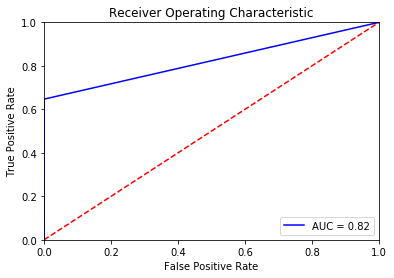

In [77]:
import sklearn.metrics as metrics
preds = result_lr1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

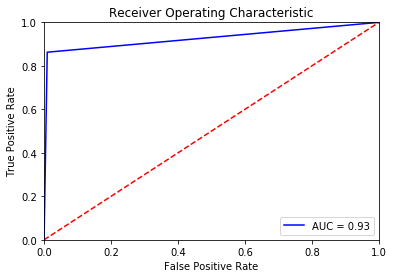

In [78]:
import sklearn.metrics as metrics
preds = result_lr2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()